In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# helpful character encoding module
import chardet
import warnings
warnings.filterwarnings('ignore')

In [107]:
#  ascii 값 확인
# with open('.\SUV_Purchase.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(10000))
# result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [2]:
df = pd.read_csv('.\SUV_Purchase.csv', encoding='utf-8')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [105]:
# df.to_csv('.\SUV_Purchase.csv', encoding='utf-8')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       400 non-null    int64 
 1   Unnamed: 0.1     400 non-null    int64 
 2   Gender           400 non-null    object
 3   Age              400 non-null    int64 
 4   EstimatedSalary  400 non-null    int64 
 5   Purchased        400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [52]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,199.500000,37.655000,69742.500000,0.357500
std,115.614301,115.614301,10.482877,34096.960282,0.479864
min,0.000000,0.000000,18.000000,15000.000000,0.000000
25%,99.750000,99.750000,29.750000,43000.000000,0.000000
50%,199.500000,199.500000,37.000000,70000.000000,0.000000
75%,299.250000,299.250000,46.000000,88000.000000,1.000000
max,399.000000,399.000000,60.000000,150000.000000,1.000000


In [54]:
#중복된 행의 데이터만 표시하기
display(df[df.duplicated()])

,Unnamed: 0,Unnamed: 0.1,Gender,Age,EstimatedSalary,Purchased


In [108]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [3]:
# UserID 삭제
df = df.drop(['User ID'], axis=1)

KeyError: "['User ID'] not found in axis"

In [4]:
# 더미변수화 (원하는 컬럼만)
df2 = pd.get_dummies(df, columns = ['Gender'])
df2

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


## 데이터 시각화

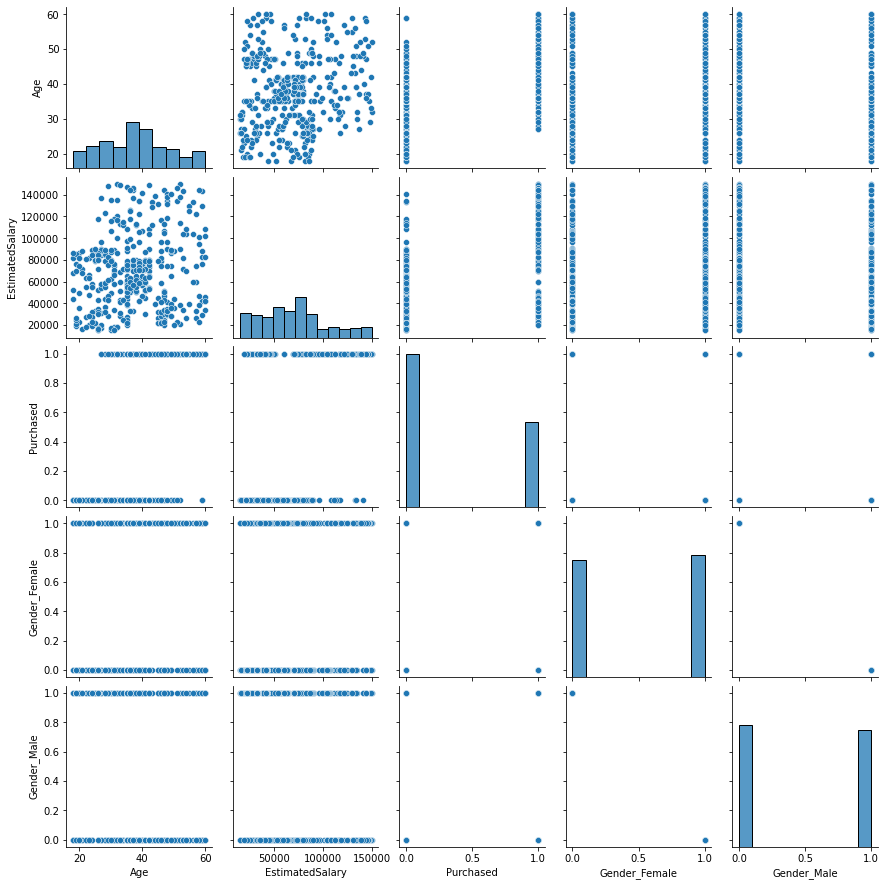

In [149]:
# 데이터프레임 열을 두 개씩 짝 지을 수 있는 모든 경우의 수에 대해 두 변수간의 산점도 그리기
# 자기 자신은 히스토그램
grid_df = sns.pairplot(df2)
plt.show()
plt.close()

## 훈련/검증/테스트 데이터 분류

In [5]:
# 데이터셋 구분 및 배열로 변환
data = df2[['Age','EstimatedSalary','Gender_Female','Gender_Male']].to_numpy()#독립변수
target= df2['Purchased'].to_numpy()#종속 변수

In [6]:
# 훈련, 테스트 세트 나누기 test_size default = 25%
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42)

In [7]:
train_input.shape, test_input.shape

((320, 4), (80, 4))

## 결정트리(교차검증, 하이퍼 파라미터 튜닝x)

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

DecisionTreeClassifier(random_state=42)

In [117]:
dt.score(sub_input, sub_target)

0.99609375

In [118]:
dt.score(val_input, val_target)

0.875

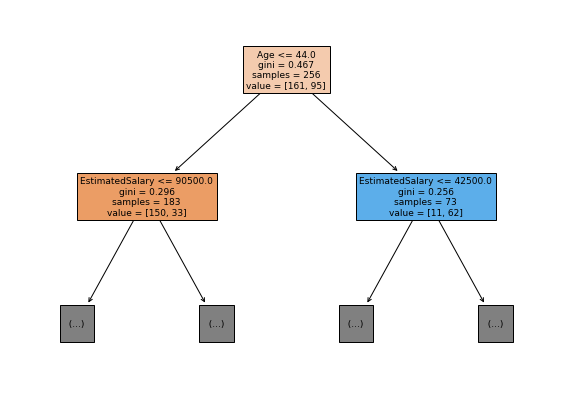

In [169]:
# 결정트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Age','EstimatedSalary','Gender_Female','Gender_Male'])
plt.show()

## 교차검증만 했을 때

In [119]:
# 교차검증 함수 사용 
# 훈련 세트 전체를 검증 함수에 전달
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)

In [120]:
# 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수 평균하여 얻음
np.mean(scores['test_score'])

0.859375

In [121]:
# 교차검증만 실행 시 왜 점수가 더 낮게 나오는 걸까?

## 결정트리 (교차검증, 그리드서치o)

In [122]:
from sklearn.model_selection import GridSearchCV
# 매개변수 설정 
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), 
         'max_depth': range(5, 20, 1),
         'min_samples_split': range(2, 100, 10)}

In [125]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1)
gs.fit(train_input, train_target)

# n_jobs=1로 했더니 UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128) 오류 해결
# 병렬처리 문제, dask는 pandas와 유사하지만 안정화 x, dask삭제
# msg = '{0}:{1}:{2}\n'.format(cmd, name, rtype).encode('utf-8')

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [126]:
print('최적 하이퍼 파라미터: ', gs.best_params_)

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 12}

In [127]:
# 최상의 교차검증 점수 확인
np.max(gs.cv_results_['mean_test_score'])

0.9

## 랜덤포레스트(교차검증, 그리드서치 o)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
# 그리드서치
params = { 'n_estimators' : [10,100],
            'max_depth':[6,8,10,12],
            'min_samples_leaf':[8,12,18],
            'min_samples_split':[8,16,20]
                    }

In [28]:
rf = RandomForestClassifier(random_state=0, n_jobs=1)

In [29]:
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=1)

In [30]:
grid_cv.fit(train_input, train_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1, random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]})

In [31]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}
최고 예측 정확도: 0.9125


In [32]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 10, 
                                max_depth = 6,
                                min_samples_leaf = 8,
                                min_samples_split = 30,
                                random_state = 0,
                                n_jobs = 1)

In [34]:
from sklearn.metrics import accuracy_score
rf_clf1.fit(train_input, train_target)
rfc_pred = rf_clf1.predict(test_input)
print('예측 정확도: {:.4f}'.format(accuracy_score(test_target,rfc_pred)))

예측 정확도: 0.9125


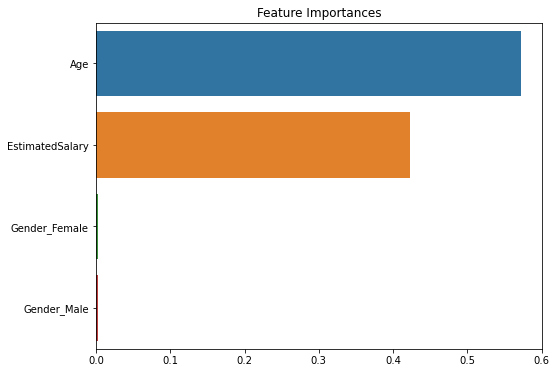

In [38]:
# 특성 중요도 평가
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = df2[['Age','EstimatedSalary','Gender_Female','Gender_Male']].columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## 교차검증, 그리드서치x

In [176]:
rfc = RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(n_estimators=10)

In [177]:
# rfc.fin()에 훈련 데이터를 입력해 Random Forest 모듈을 학습
rfc.fit(train_input, train_target)
#test data를 입력해 target data를 예측 (매번 달라짐)
prediction = rfc.predict(test_input)
#예측 결과 precision과 실제 test data의 target을 비교
print(prediction==test_target)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True False]


In [178]:
#test data 정확도 측정
rfc.score(test_input, test_target)

0.8875

In [182]:
# test data 분류성능 평가
print(classification_report(prediction, test_target))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.82      0.85      0.84        27

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



## XGboost(교차검증, 그리드서치 o)

In [132]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [131]:
# !pip install xgboost

In [147]:
# 객체 생성, 일단 트리 100개 만듬
xgb = XGBClassifier(n_estimators=100)

In [151]:
# 후보 파라미터 선정
params = {'max_depth':range(3, 10, 1), 'learning_rate':np.arange(0.01,0.2,0.05), 'min_child_weight':range(1,3,1), 'colsample_bytree':np.arange(0.5,1,0.1)}
# 'min_child_weight' child 에서 필요한 모든 관측치에 대한 가중치의 최소 합, 
# 이 값보다 샘플 수가 작으면 leaf node가 되는 것, 너무 크면 under-fitting 될 수 있음
#  colsample_bytree 각 트리마다 feature 샘플링 비율 일반적으로 0.5 ~ 1

In [152]:
# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 5번)
gs = GridSearchCV(xgb, params, cv=5)

In [154]:
# 파라미터 튜닝 시작
gs.fit(train_input, train_target, early_stopping_rounds=30)
# early_stopping_rounds 최대한 몇 개의 트리를 완성해볼 것인지 valid loss에 더이상 진전이 없으면 멈춤, 
# 과적합을 방지할 수 있음, n_estimators 가 높을때 주로 사용.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\

[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\


[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\

[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\

[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\

[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo


[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 189, in train
    bst = _train_internal(params, dtrain,
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\training.py", line 82, in _train_internal
    if callbacks.after_iteration(bst, i, dtrain, evals):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboo

AssertionError: Must have at least 1 validation dataset for early stopping.

In [155]:
#튜닝된 최상의 매개변수 출력
print('최적 하이퍼 파라미터: ',gs.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1}


In [156]:
# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

In [159]:
# 학습
model = xgb_model.fit(train_input, train_target)

[14:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [170]:
# 테스트 성능 평가
xgb_pred2 = model.predict(test_input)

## 이진분류 성능평가(그리드서치o)

## F점수

In [171]:
from sklearn.metrics import classification_report
print(classification_report(test_target, xgb_pred2, target_names=['구매결정x(0)', '구매결정o(1)']))

              precision    recall  f1-score   support

    구매결정x(0)       0.94      0.92      0.93        52
    구매결정o(1)       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



## ROC Curve

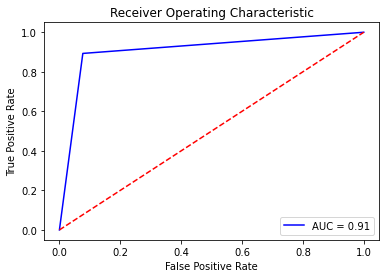

In [172]:
buildROC(test_target,xgb_pred2)

## 이진분류 성능평가(그리드서치x)

### F점수

In [141]:
from sklearn.metrics import classification_report
print(classification_report(test_target, xgb_pred, target_names=['구매결정x(0)', '구매결정o(1)']))

              precision    recall  f1-score   support

    구매결정x(0)       0.92      0.90      0.91        52
    구매결정o(1)       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



In [ ]:
# macro: 단순평균
# weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
# accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.

# 해석
# 구매결정x라고 예측한 데이터의 92%가 실제로 0
# 구매결정o라고 예측한 데이터의 83%가 실제로 1
# 실제 구매결정x인 데이터의 90%가 0
# 실제 구매결정o인 데이터의 86%가 0

## ROC Curve

In [145]:
from sklearn import metrics
def buildROC(test_target,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(test_target,test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

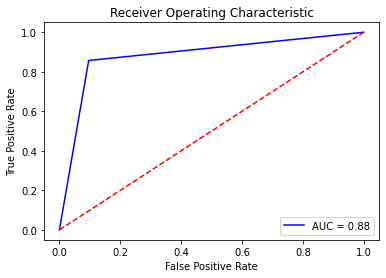

In [146]:
buildROC(test_target,xgb_pred)

### 결론: 그리드 서치 Xgboost 예측모델이 그리드서치 안했을 때보다 성능이 더 우수 (0.89->0.91)

### 모델 저장 및 불러오기(xgboost 내장함수 이용)

In [173]:
# 파일명
filename = 'xgb_model.model'

In [174]:
# 모델 저장
model.save_model(filename)

In [ ]:
# 모델 불러오기
new_xgb_model = xgb.XGBClassifier() # 모델 초기화
new_xgb_model.load_model(filename) # 모델 불러오기

### 이후 과정 -> 예측템플릿 작성,  Submission 파일 작업 및 내보내기